In [ ]:
# Path
import sys
import os
import numpy as np
qprc_path = os.path.abspath(os.path.join('..'))
if qprc_path not in sys.path:
    sys.path.append(qprc_path)

# The Non-singleton kernel on Fuzzy Sets
The function `nonsingleton_gaussian_kernel` from the `kernels` module implements the cross product kernel on fuzzy sets:

\begin{align*}
    k(X,X')=sup_{x\in \mathcal{X}} X(x)\star X'(x)
\end{align*}

where:

* $k$ is the nonsingleton kernel on fuzzy sets
* $\star$ is the T-norm operator
* $X,X'$ fuzzy sets

For instance the non-singleton Gaussian kernel on fuzzy sets takes the following form:
\begin{align*}
    \prod_{d=1}^D\exp\Big(-0.5*\gamma*\frac{(x_d-x'_d)^2}{\sigma_d^2 + \sigma_d'^2}\Big)
\end{align*}



## Measuring the similarity between fuzzy sets



 Similarity measure between fuzzy sets X and Y using the cross-product kernel on fuzzy sets with :
- non-singleton Gaussian kernel: 0.575927049696494


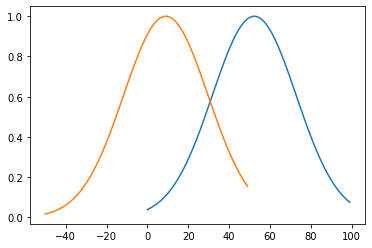

In [5]:
from kernelfuzzy.fuzzyset import FuzzySet
from kernelfuzzy.memberships import gaussmf
from kernelfuzzy import kernels
from kernelfuzzy.kernels import nonsingleton_gaussian_kernel
from sklearn.metrics import pairwise
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt
%matplotlib inline


#defining two fuzzy sets: X and Y
#-------------------------------------
# a fuzzy set X
vals = np.random.uniform(0, 100, 50)
mu_x,sigma_x=[np.mean(vals), np.std(vals)]
X = FuzzySet(membership_function_params=[mu_x,sigma_x])

# a fuzzy set Y
vals = np.random.uniform(-50, 50, 50)
mu_y, sigma_y=[np.mean(vals), np.std(vals)]
Y = FuzzySet(membership_function_params=[mu_y, sigma_y])

elems=list(range(0,100))
plt.plot(elems,np.exp(-np.square(elems - mu_x)/sigma_x**2))
elems=list(range(-50,50))
plt.plot(elems,np.exp(-np.square(elems - mu_y)/sigma_y**2))

#implementing fuzzy sets similarity with kernels on fuzzy sets
#-------------------------------------

print('\n Similarity measure between fuzzy sets X and Y using the non-singleton Gaussiankernel on fuzzy sets with :')
print('- non-singleton Gaussian kernel: {}'.format(nonsingleton_gaussian_kernel(X,Y,gamma=1)))



 Similarity measure between fuzzy sets using the Non-singleton kernel on fuzzy sets with :
$\gamma$ 0.01
similarity 7 and 10 = 0.8760317528329519
similarity 7 and 20 = 0.31921453079818707
$\gamma$ 0.1
similarity 7 and 10 = 0.266194133351106
similarity 7 and 20 = 1.0985669371691719e-05
$\gamma$ 1
similarity 7 and 10 = 1.7864250433123454e-06
similarity 7 and 20 = 2.5601490015114e-50
$\gamma$ 10
similarity 7 and 10 = 3.3101523555079485e-58
similarity 7 and 20 = 0.0
$\gamma$ 100
similarity 7 and 10 = 0.0
similarity 7 and 20 = 0.0


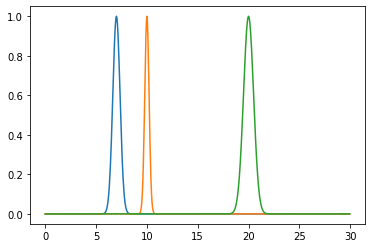

In [19]:
#defining two fuzzy sets: X and Y
#-------------------------------------
# a fuzzy set X
seven = FuzzySet(membership_function_params=[7.0,0.5])
ten = FuzzySet(membership_function_params=[10.0, 0.3])
twenty = FuzzySet(membership_function_params=[20.0, 0.7])

elems=np.arange(0, 30, 0.05).tolist()
mu, sig=np.array(seven.get_membership_function_params()).astype(float)
plt.plot(elems,np.exp(-np.square(elems - mu)/sig**2))
mu, sig=np.array(ten.get_membership_function_params()).astype(float)
plt.plot(elems,np.exp(-np.square(elems - mu)/sig**2))
mu, sig=np.array(twenty.get_membership_function_params()).astype(float)
plt.plot(elems,np.exp(-np.square(elems - mu)/sig**2))


#implementing fuzzy sets similarity with kernels on fuzzy sets
#-------------------------------------
print('\n Similarity measure between fuzzy sets using the Non-singleton kernel on fuzzy sets with :')

gamma_param=[0.01, 0.1, 1, 10, 100]
for gamma in gamma_param:
    print('$\gamma$ {}'.format(gamma))
    print('similarity 7 and 10 = {}'.format(nonsingleton_gaussian_kernel(seven,ten,gamma)))
    print('similarity 7 and 20 = {}'.format(nonsingleton_gaussian_kernel(seven,twenty,gamma)))
